## Assignment 1
### Name: sake venkata vignan kumar
### Roll Number:20CS30070

In [173]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
data = pd.read_csv('../../dataset/linear-regression.csv')
print(data.shape) 

(1599, 12)


In [175]:

# Split the dataset into training, validation, and test sets
def train_val_test_split(data, train_ratio, val_ratio):
    num_examples = len(data)
    num_train = int(num_examples * train_ratio)
    num_val = int(num_examples * val_ratio)
    train_data = data[:num_train]
    val_data = data[num_train:num_train + num_val]
    test_data = data[num_train + num_val:]
    return train_data, val_data, test_data

train_data, val_data, test_data = train_val_test_split( data, train_ratio=0.5, val_ratio=0.3)

# Separate features and target variable for training, validation, and test sets
X_train, y_train = train_data.drop(columns=['quality']), train_data['quality']
X_val, y_val = val_data.drop(columns=['quality']), val_data['quality']
X_test, y_test = test_data.drop(columns=['quality']), test_data['quality']

# Normalize the features (subtract mean and divide by standard deviation)
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Add a bias term to the features
X_train['bias'] = 1
X_val['bias'] = 1
X_test['bias'] = 1

# Convert DataFrames to numpy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# Analytical solution for linear regression
def analytical_linear_regression(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X_inv = np.linalg.inv(np.dot(X_transpose, X))
    w = np.dot(np.dot(X_transpose_X_inv, X_transpose), y)
    return w

# Train the model using the analytical solution
weights = analytical_linear_regression(X_train, y_train)

# Make predictions on the validation set
y_val_pred = np.dot(X_val, weights)

# Make predictions on the test set
y_test_pred = np.dot(X_test, weights)

# Calculate R-squared and RMSE on the test set
r2_test = 1 - np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

print(f"Test R-squared: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")


Test R-squared: -56.8144
Test RMSE: 5.9115


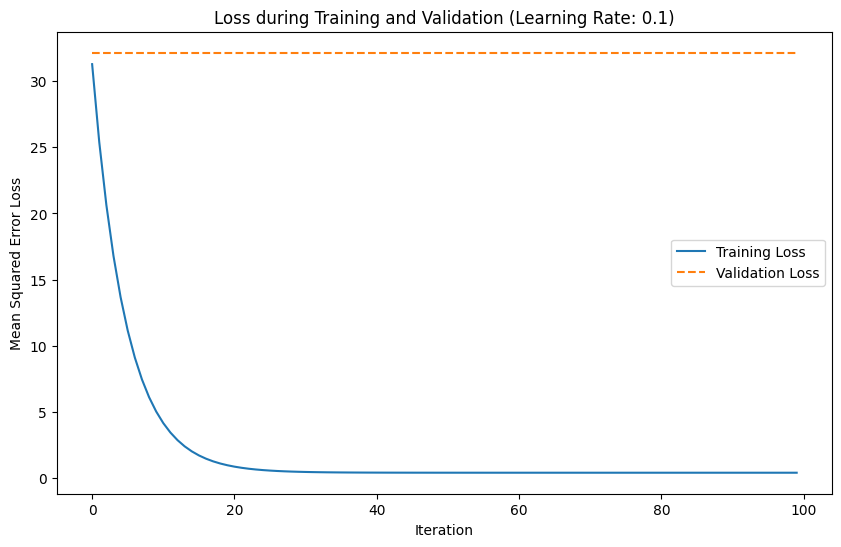

Learning Rate: 0.1
Test R-squared: -55.6464
Test RMSE: 5.8514



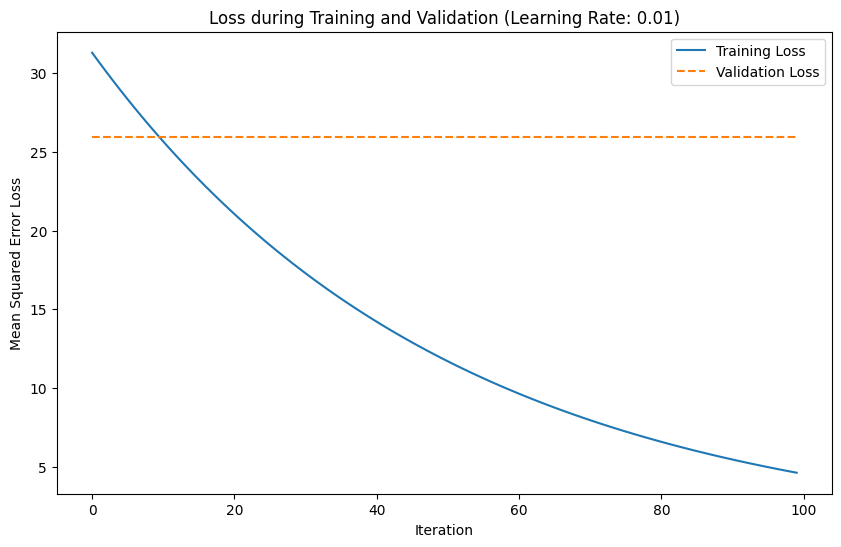

Learning Rate: 0.01
Test R-squared: -44.7119
Test RMSE: 5.2564



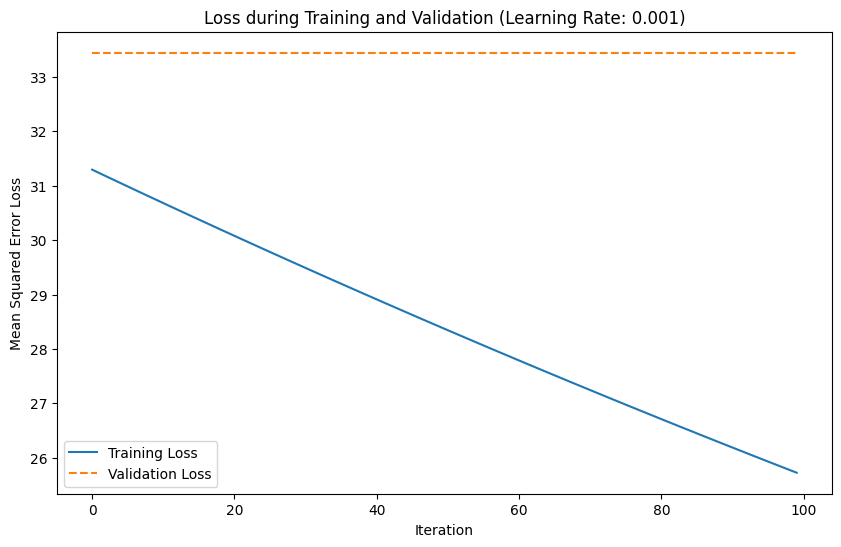

Learning Rate: 0.001
Test R-squared: -50.1479
Test RMSE: 5.5602



In [177]:
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    loss_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / num_samples
        weights -= learning_rate * gradient
        mse = np.mean(error ** 2)
        loss_history.append(mse)
    
    return weights, loss_history

learning_rates = [0.1, 0.01, 0.001]
num_iterations = 100

# Create separate plots for training and validation losses for each learning rate
for lr in learning_rates:
    plt.figure(figsize=(10, 6))
    
    weights, train_loss = gradient_descent(X_train, y_train, lr, num_iterations)
    val_predictions = np.dot(X_val, weights)
    val_error = val_predictions - y_val
    val_loss = np.mean(val_error ** 2)
    
    plt.plot(range(num_iterations), train_loss, label='Training Loss')
    plt.plot([0, num_iterations - 1], [val_loss, val_loss], label='Validation Loss', linestyle='dashed')
    
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error Loss')
    plt.title(f'Loss during Training and Validation (Learning Rate: {lr})')
    plt.legend()
    plt.show()

    # Report the R-squared and RMSE scores for each learning rate
    y_test_pred = np.dot(X_test, weights)
    r2_test = 1 - np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    print(f"Learning Rate: {lr}")
    print(f"Test R-squared: {r2_test:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")
    print()
